# Downloading Climate Data from Climate Data Store 

* This notebook was developed to download Climate data that is produced for AR6 report using API from Climate Data Store. https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=form

* I added my API key in this GitHub. If you set up the your own API key, please follow the link below.  

    https://confluence.ecmwf.int/display/CKB/How+to+install+and+use+CDS+API+on+Windows
    
    https://cds.climate.copernicus.eu/api-how-to    

In [1]:
# import cdsapi to download climate data using API
import cdsapi

c = cdsapi.Client()

## 1. Download Historical GCM data

### 1.1 Set Temporal Resolution

<img src="./figures/CMIP6_1.PNG" width="1100">

In [2]:
temporal_resolution = "daily"

### 1.2 Set Experiment "Historical"

<img src="./figures/CMIP6_2.PNG" width="1100">

In [3]:
experiment = 'historical'

### 1.3 Set Level

<img src="./figures/CMIP6_3.PNG" width="1100">

In [4]:
level = "single_levels"     

### 1.4 Set Variable (example: precipitation)

<img src="./figures/CMIP6_4.PNG" width="1100">

In [5]:
variable = 'precipitation',

### 1.5 Set Model (example:EC-Earth3-Veg-LR(Europe))

<img src="./figures/CMIP6_5.PNG" width="1100">

In [6]:
model =  'ec_earth3_veg_lr'

### 1.6 Set Temporal subset

 * if you set "Whole available temporal range", you don't need to set temporal subset in api command.

<img src="./figures/CMIP6_6.PNG" width="1100">

### 7. Set Geographical Area (example: Uganda - North:6, South:-3, West:27, East:37)

<img src="./figures/CMIP6_7.PNG" width="1100">

In [7]:
area = [6, 27, -3, 37, ]

In [8]:
c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': temporal_resolution,
        'experiment': experiment,
        'level': level,
        'variable': variable,
        'model': model,
        'area': area,
    },
    'uganda_kampala_gcm_historical.zip')

2022-08-22 06:23:36,579 INFO Welcome to the CDS
2022-08-22 06:23:36,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2022-08-22 06:23:36,887 INFO Request is completed
2022-08-22 06:23:36,889 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/adaptor.esgf_wps.retrieve-1661123256.4861677-22130-18-2fafb0aa-7e50-4b9d-af4e-e22bae55e881.zip to uganda_kampala_gcm_historical.zip (11.9M)
2022-08-22 06:23:37,813 INFO Download rate 12.9M/s  


Result(content_length=12507098,content_type=application/zip,location=https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/adaptor.esgf_wps.retrieve-1661123256.4861677-22130-18-2fafb0aa-7e50-4b9d-af4e-e22bae55e881.zip)

In [9]:
!unzip uganda_kampala_gcm_historical.zip

Archive:  uganda_kampala_gcm_historical.zip
 extracting: pr_day_EC-Earth3-Veg-LR_historical_r1i1p1f1_gr_18500101-20141231_v20200217.nc  
 extracting: adaptor.esgf_wps.retrieve-1661123256.4861677-22130-18-2fafb0aa-7e50-4b9d-af4e-e22bae55e881_provenance.json  
 extracting: adaptor.esgf_wps.retrieve-1661123256.4861677-22130-18-2fafb0aa-7e50-4b9d-af4e-e22bae55e881_provenance.png  


In [13]:
# read five nc files
import xarray as xr
reanalysis_data = xr.open_dataset('pr_day_EC-Earth3-Veg-LR_historical_r1i1p1f1_gr_18500101-20141231_v20200217.nc')
reanalysis_data

<xarray.Dataset>
Dimensions:    (time: 60265, bnds: 2, lat: 8, lon: 9)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lat        (lat) float64 -2.804 -1.682 -0.5607 0.5607 ... 2.804 3.925 5.047
  * lon        (lon) float64 27.0 28.12 29.25 30.38 31.5 32.62 33.75 34.88 36.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    contact:                cmip6-data@ec-earth.org
    creation_date:          2020-02-17T13:29:51Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by EC-Earth-Consortium ...
    cmor_version:           3.5.0
    branch_time_in_parent:  164359.0
    tracking_id:            hdl:21.14100/037c3f46-ad12-415a-bfaf-812c1bf9662f

In [14]:
reanalysis_data['pr'] = reanalysis_data['pr'][59000:60000] * 86400

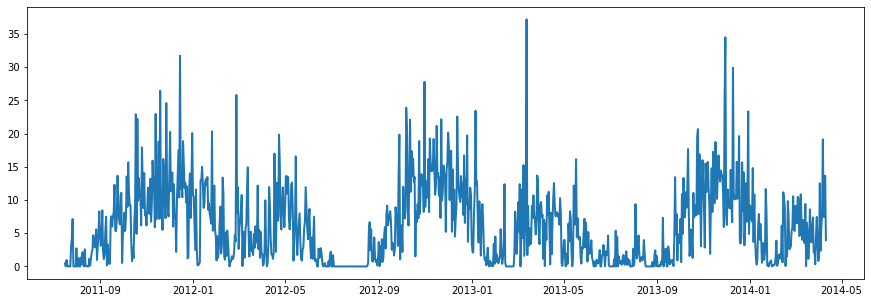

In [15]:
import matplotlib.pyplot as plt
# plot
fig, ax = plt.subplots(figsize=(15,5))
x=reanalysis_data.time.values
y=reanalysis_data.pr.values[:,0,0]

ax.plot(x, y, linewidth=2.0)
plt.show()

## 2. Download GCM SSP Scenario data

### 2.1 Set Temporal Resolution

<img src="./figures/CMIP6_1.PNG" width="1100">

In [12]:
temporal_resolution = "daily"

### 2.2 Set Experiment "SSP3-7.0"

<img src="./figures/CMIP6_2.PNG" width="1100">

In [22]:
experiment = 'ssp3_7_0'

### 1.3 Set Level

<img src="./figures/CMIP6_3.PNG" width="1100">

In [14]:
level = "single_levels"     

### 1.4 Set Variable (example: precipitation)

<img src="./figures/CMIP6_4.PNG" width="1100">

In [15]:
variable = 'precipitation',

### 1.5 Set Model (example: HadGEM3-GC31-MM(UK))

<img src="./figures/CMIP6_5.PNG" width="1100">

In [16]:
model =  'ec_earth3_veg_lr'

### 1.6 Set Temporal subset: 2022-01-01 ~ 2100-12-31

 * Set "Temporal range"

<img src="./figures/CMIP6_6.PNG" width="1100">

### 7. Set Geographical Area (example: Uganda - North:6, South:-3, West:27, East:37)

<img src="./figures/CMIP6_7.PNG" width="1100">

In [17]:
area = [6, 27, -3, 37, ]

In [23]:
c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': temporal_resolution,
        'experiment': experiment,
        'level': level,
        'variable': variable,
        'model': model,
        'date': '2022-01-01/2100-12-31',
        'area': area,
    },
    'uganda_kampala_gcm_ssp3.zip')

2022-08-19 09:27:36,063 INFO Welcome to the CDS
2022-08-19 09:27:36,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2022-08-19 09:27:36,388 INFO Request is queued
2022-08-19 09:27:37,714 INFO Request is running
2022-08-19 09:30:31,337 INFO Request is completed
2022-08-19 09:30:31,338 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data7/adaptor.esgf_wps.retrieve-1660868973.9654913-30186-19-d67b4e92-744b-40b0-8570-cfbc261092e6.zip to uganda_kampala_gcm_ssp3.zip (5.6M)
2022-08-19 09:30:39,094 INFO Download rate 740.2K/s 


Result(content_length=5878835,content_type=application/zip,location=https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data7/adaptor.esgf_wps.retrieve-1660868973.9654913-30186-19-d67b4e92-744b-40b0-8570-cfbc261092e6.zip)